In [1]:
pip install console-progressbar

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
from torchvision.transforms import ToTensor
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [6]:
#import opendatasets as od

#dataset_url = 'https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder'
#od.download(dataset_url)

In [7]:
import zipfile

def extract(zip_file, path):
    with zipfile.ZipFile(zip_file, 'r') as opened_zip:
        opened_zip.extractall(path)

# Specify the path to the .zip file and the destination path for extraction
zip_file_path = 'D:/NCI/NCISEM2/Abubakkar/GITProject/Vehicle-Make-Color-Recognition/DataSet/car_data.zip'
destination_path = 'D:/NCI/NCISEM2/Abubakkar/GITProject/Vehicle-Make-Color-Recognition/DataSet/car_data'

# Call the extract function
#extract(zip_file_path, destination_path)

# Print the complete destination path
print("Extraction complete. Files extracted to:", destination_path)


Extraction complete. Files extracted to: D:/NCI/NCISEM2/Abubakkar/GITProject/Vehicle-Make-Color-Recognition/DataSet/car_data


In [8]:
from torch.utils.data import Dataset
import os

DATA_DIR_TRAIN = 'D:/NCI/NCISEM2/Abubakkar/GITProject/Vehicle-Make-Color-Recognition/DataSet/car_data/car_data/train'
train_classes = os.listdir(DATA_DIR_TRAIN)

DATA_DIR_TEST = 'D:/NCI/NCISEM2/Abubakkar/GITProject/Vehicle-Make-Color-Recognition/DataSet/car_data/car_data/test'
test_classes = os.listdir(DATA_DIR_TEST)

train_classes[:5], test_classes[:5]

(['Acura Integra Type R 2001',
  'Acura RL Sedan 2012',
  'Acura TL Sedan 2012',
  'Acura TL Type-S 2008',
  'Acura TSX Sedan 2012'],
 ['Acura Integra Type R 2001',
  'Acura RL Sedan 2012',
  'Acura TL Sedan 2012',
  'Acura TL Type-S 2008',
  'Acura TSX Sedan 2012'])

In [9]:
# Tie the class indices to their names

def find_classes(dir):
    train_classes = os.listdir(dir)
    train_classes.sort()
    train_class_to_idx = {train_classes[i]: i for i in range(len(train_classes))}
    return train_classes, train_class_to_idx
    test_class_to_idx = {test_classes[i]: i for i in range(len(test_classes))}
    return test_classes, test_class_to_idx

train_classes, train_c_to_idx = find_classes(DATA_DIR_TRAIN)
test_classes, test_c_to_idx = find_classes(DATA_DIR_TEST)

In [10]:
train_classes[:5], test_classes[:5]

(['AM General Hummer SUV 2000',
  'Acura Integra Type R 2001',
  'Acura RL Sedan 2012',
  'Acura TL Sedan 2012',
  'Acura TL Type-S 2008'],
 ['AM General Hummer SUV 2000',
  'Acura Integra Type R 2001',
  'Acura RL Sedan 2012',
  'Acura TL Sedan 2012',
  'Acura TL Type-S 2008'])

In [11]:
len(train_classes), len(test_classes)

(196, 196)

In [12]:
train_classes == test_classes

True

In [13]:
# Tie the class indices to their names

def find_classes(dir):
    test_classes = os.listdir(dir)
    test_classes.sort()
    test_class_to_idx = {test_classes[i]: i for i in range(len(test_classes))}
    return test_classes, test_class_to_idx
test_classes, test_c_to_idx = find_classes(DATA_DIR_TEST)

In [14]:
def extract_class(Datasets):
  for vals in os.listdir(Datasets):
    print(vals)

In [15]:
extract_class(DATA_DIR_TRAIN)

Acura Integra Type R 2001
Acura RL Sedan 2012
Acura TL Sedan 2012
Acura TL Type-S 2008
Acura TSX Sedan 2012
Acura ZDX Hatchback 2012
AM General Hummer SUV 2000
Aston Martin V8 Vantage Convertible 2012
Aston Martin V8 Vantage Coupe 2012
Aston Martin Virage Convertible 2012
Aston Martin Virage Coupe 2012
Audi 100 Sedan 1994
Audi 100 Wagon 1994
Audi A5 Coupe 2012
Audi R8 Coupe 2012
Audi RS 4 Convertible 2008
Audi S4 Sedan 2007
Audi S4 Sedan 2012
Audi S5 Convertible 2012
Audi S5 Coupe 2012
Audi S6 Sedan 2011
Audi TT Hatchback 2011
Audi TT RS Coupe 2012
Audi TTS Coupe 2012
Audi V8 Sedan 1994
Bentley Arnage Sedan 2009
Bentley Continental Flying Spur Sedan 2007
Bentley Continental GT Coupe 2007
Bentley Continental GT Coupe 2012
Bentley Continental Supersports Conv. Convertible 2012
Bentley Mulsanne Sedan 2011
BMW 1 Series Convertible 2012
BMW 1 Series Coupe 2012
BMW 3 Series Sedan 2012
BMW 3 Series Wagon 2012
BMW 6 Series Convertible 2007
BMW ActiveHybrid 5 Sedan 2012
BMW M3 Coupe 2012
BMW M5

In [16]:
train_dataset = ImageFolder(DATA_DIR_TRAIN, transform = ToTensor())
test_dataset = ImageFolder(DATA_DIR_TEST, transform = ToTensor())

In [17]:
len(train_dataset), len(test_dataset)

(8144, 8041)

In [18]:
image, label = train_dataset[0]
print('image_shape:', image.shape, 'Label:',label)

image_shape: torch.Size([3, 525, 700]) Label: 0


In [19]:
image, label = train_dataset[1]
print('image_shape:', image.shape, 'Label:',label)

image_shape: torch.Size([3, 64, 85]) Label: 0


# Creating data transformations, data loaders

The image tensors of element 0 and 1 from the train dataset are of different shapes i.e. 3 * 523 * 700 v/s 3 * 64 * 85 .

We can view the images using matplotlib, but we need to change the tensor dimensions to (X,Y,3). Let's create a helper function to display an image and its label.

In [20]:
def show_example(img, label):
    print('Label: ', train_dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  AM General Hummer SUV 2000 (0)


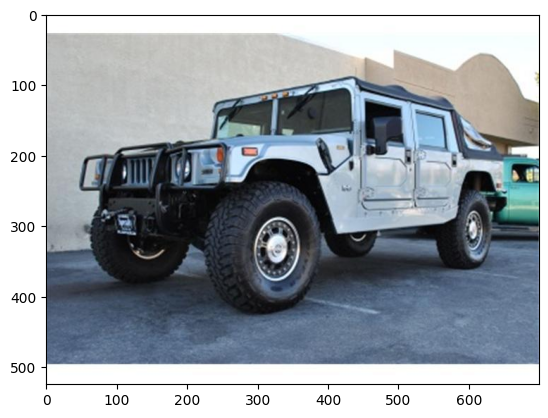

In [21]:
show_example(*train_dataset[0])

Label:  Plymouth Neon Coupe 1999 (171)


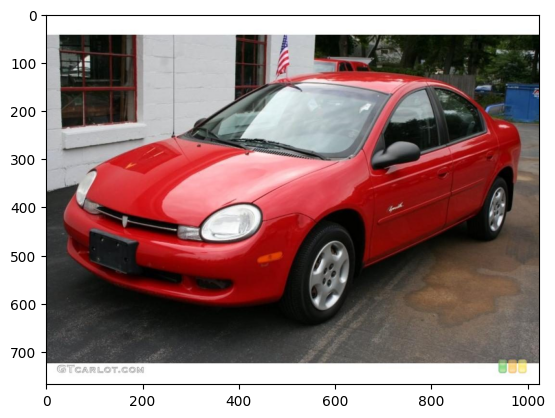

In [22]:
show_example(*test_dataset[7030])

Label:  AM General Hummer SUV 2000 (0)


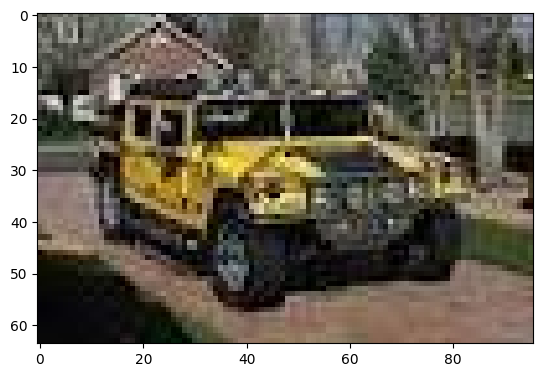

In [23]:
show_example(*test_dataset[0])

To display batches of data in a grid, we need to normalize the dimensions of the images. Here we are using 256 x 256px images with normalization to yield 3 * 256 * 256

In [24]:
train_tfms = tt.Compose([tt.Resize((256, 256)),
                         tt.RandomRotation(0),
                         tt.ToTensor(),
                         tt.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
test_tfms = tt.Compose([tt.Resize((256, 256)),
                        tt.ToTensor(),
                        tt.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [25]:
train_dataset = ImageFolder(DATA_DIR_TRAIN, transform = train_tfms)
test_dataset = ImageFolder(DATA_DIR_TEST, transform = test_tfms)

Let's look at the standardized/normalized/transformed datasets. The list of classes is stored in the .classes property of the dataset. The numeric label for each element corresponds to index of the element's label in the list of classes.

In [26]:
# Pick the last 4 from the training dataset
train_dataset.classes[-5:-1]

['Volkswagen Golf Hatchback 2012',
 'Volvo 240 Sedan 1993',
 'Volvo C30 Hatchback 2012',
 'Volvo XC90 SUV 2007']

In [27]:
# Lift index 5: 9 in the test dataset
test_dataset.classes[5:9]

['Acura TSX Sedan 2012',
 'Acura ZDX Hatchback 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012']

In [28]:
len(train_dataset), len(test_dataset)

(8144, 8041)

The standardized training and test datasets have 8144 and 8041 elements respectively. Each element is a tuple, containing an image tensor and a label. Since the data consists of 256 * 256px color images with 3 channels (RGB), each image tensor has the shape (3, 256, 256)

In [29]:
image, label = train_dataset[0]
print('image_shape:', image.shape, 'Label:',label)

image_shape: torch.Size([3, 256, 256]) Label: 0


In [30]:
image, label = test_dataset[7030]
print('image_shape:', image.shape, 'Label:',label)

image_shape: torch.Size([3, 256, 256]) Label: 171


We can view the images using matplotlib, but we need to change the tensor dimensions to (256,256,3).

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  AM General Hummer SUV 2000 (0)


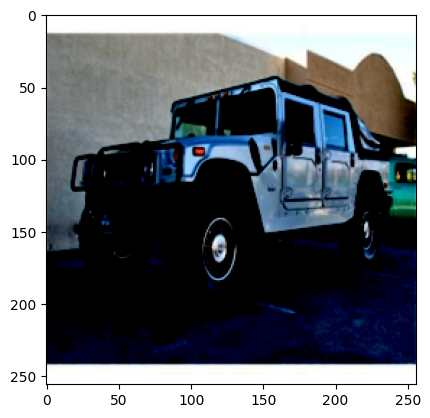

In [31]:
show_example(*train_dataset[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  Plymouth Neon Coupe 1999 (171)


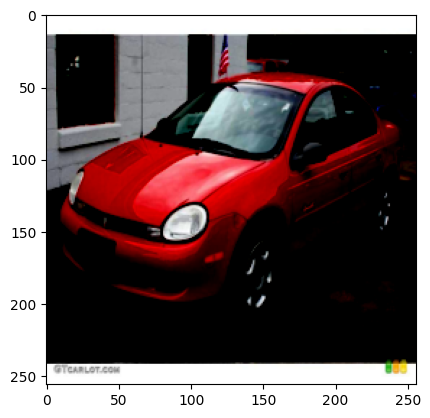

In [32]:
show_example(*test_dataset[7030])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  AM General Hummer SUV 2000 (0)


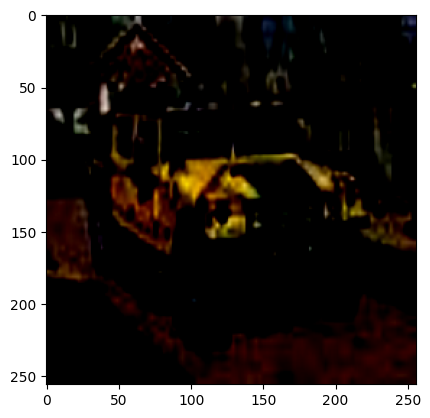

In [33]:
show_example(*test_dataset[0]);


You can see the difference between the standardized and non-standardized images earlier due to normalization


Training and Validation Datasets
While building real world machine learning models, it is quite common to split the dataset into 3 parts:

Training set - used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.
Validation set - used to evaluate the model while training, adjust hyperparameters (learning rate etc.) and pick the best version of the model.
Test set - used to compare different models, or different types of modeling approaches, and report the final accuracy of the model.
Since there's no predefined validation set, we can set aside a small portion (10 percent of images) of the training set to be used as the validation set. We'll use the random_split helper method from PyTorch to do this. To ensure that we always create the same validation set, we'll also set a seed for the random number generator.

In [34]:
random_seed = 42
torch.manual_seed(random_seed);

In [35]:
val_percent = 0.1
val_size = int(val_percent * len(train_dataset))
train_size = len(train_dataset) - val_size

train_ds, val_ds = random_split(train_dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(7330, 814)

The jovian library also provides a simple API for recording important parameters related to the dataset, model training, results etc. for easy reference and comparison between multiple experiments. Let's record dataset_url, val_pct and rand_seed using jovian.log_dataset

In [36]:
pip install jovian --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
pip install jovian --upgrade --user

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import jovian

<IPython.core.display.Javascript object>

In [39]:
dataset_url ="D:/NCI/NCISEM2/Abubakkar/GITProject/Vehicle-Make-Color-Recognition/DataSet/car_data/car_data"

In [40]:
jovian.log_dataset(dataset_url = dataset_url, val_size = val_size, random_seed = random_seed)


[jovian] Dataset logged.


We can now create data loaders for training and validation, to load the data in batches

In [41]:
batch_size = 128

In [42]:
train_dl = DataLoader(train_ds, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(val_ds, batch_size * 2, num_workers = 4, pin_memory=True)

We can look at batches of images from the dataset using the make_grid method from torchvision. Each time the following code is run, we get a different bach, since the sampler shuffles the indices before creating batches.

In [43]:
def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize = (12,6))
    ax.set_xticks([]), ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1,2,0))
    break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


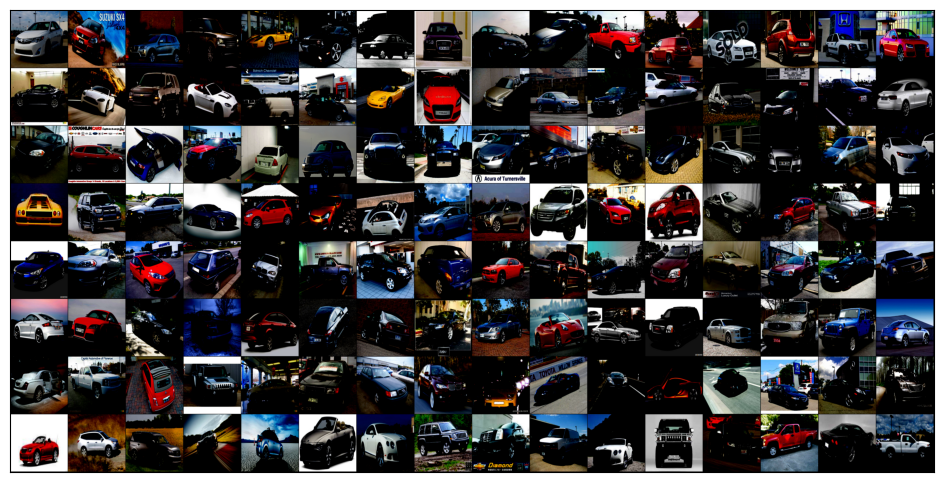

In [44]:
show_batch(train_dl);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


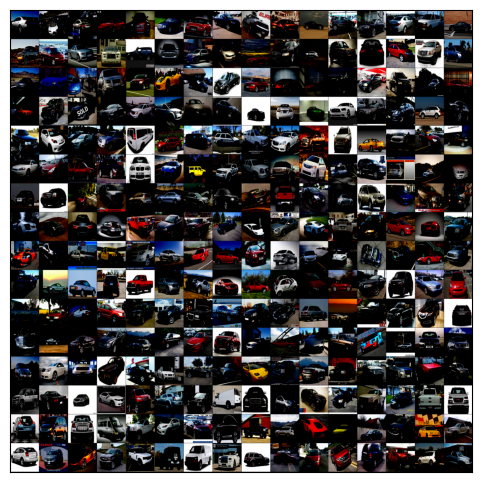

In [45]:
show_batch(val_dl); 

In [46]:
# Execute this to save new versions of the notebook
jovian.commit(project="car_data")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


# Convolutional Neural Networks
We will use a convolutional neural network, using the nn.Conv2d class from PyTorch

In [47]:
simple_model = nn.Sequential(
    nn.Conv2d(3,8, kernel_size = 3, stride = 1, padding = 1),
    nn.MaxPool2d(2,2)
)

In [48]:
for images, labels in train_dl:
  print('images.shape:', images.shape)
  out = simple_model(images)
  print('out.shape:', out.shape)
  break

images.shape: torch.Size([128, 3, 256, 256])
out.shape: torch.Size([128, 8, 128, 128])


# The Conv2d layer transforms a 3-channel image to an 8-channel feature map, and the MaxPool2d layer halves the height and width. The feature map gets smaller as we add more layers, until we are finally left with a small feature map, which can be flattened into a vector. We can then add some fully connected layers at the end to get vector of size 10 for each image.



Let's define the model by extending an ImageClassificationBase class which contains helper methods for training & validation.

In [49]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

We'll use nn.Sequential to chain the layers and activations functions into a single network architecture.

In [50]:
class StanfordCarsModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 16 x 128 x 128

            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 32 x 64 x 64

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 32 x 32

            nn.Flatten(), 
            nn.Linear(64*32*32, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 196))
        
    def forward(self, xb):
        return self.network(xb)

In [51]:
model = StanfordCarsModel()
model

StanfordCarsModel(
  (network): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=65536, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=1

Let's verify that the model produces the expected output on a batch of training data. The 196 outputs for each image can be interpreted as probabilities for the 196 target classes (after applying softmax), and the class with the highest probability is chosen as the label predicted by the model for the input image. Check out Part 3 (logistic regression) for a more detailed discussion on interpeting the outputs, applying softmax and identifying the predicted labels.

In [52]:
for images, labels in train_dl:
  print('images.shape:', images.shape)
  out = model(images)
  print('out.shape:', out.shape)
  print('out[0]:', out[0])
  break

images.shape: torch.Size([128, 3, 256, 256])
out.shape: torch.Size([128, 196])
out[0]: tensor([ 2.1786e-02, -1.5206e-02,  4.6277e-03, -3.0542e-02, -3.8128e-03,
        -2.8037e-02,  4.8563e-02,  1.4941e-02,  8.3478e-03,  3.7509e-02,
        -1.3049e-02, -3.6722e-02, -1.3989e-02,  1.4492e-02,  1.9503e-02,
        -1.3537e-02, -2.5842e-02,  2.6664e-02, -4.1386e-02, -2.7093e-02,
        -4.3256e-02,  3.0311e-02,  4.5730e-02, -2.5875e-02,  1.0034e-02,
         3.1092e-02,  3.5089e-02, -3.5114e-02, -3.0831e-02, -2.2226e-02,
         2.9260e-02,  2.0077e-03,  1.2155e-02, -4.5494e-02,  2.4754e-02,
        -6.6658e-05,  1.1284e-02,  2.4073e-02,  1.2969e-02, -1.4379e-02,
        -3.6603e-02, -2.0972e-02,  3.0477e-02, -5.0230e-02, -3.7623e-02,
         3.0288e-02,  4.6172e-03,  1.9275e-02, -1.8634e-02,  2.1348e-02,
         5.2922e-03, -3.1090e-02,  4.0407e-02, -3.3264e-02,  3.8235e-02,
        -3.3764e-02, -2.4651e-02,  3.1452e-02,  6.6866e-04,  3.4223e-02,
         1.0028e-02,  8.2942e-03,  2.

To seamlessly use a GPU, if one is available, we define a couple of helper functions (get_default_device & to_device) and a helper class DeviceDataLoader to move our model & data to the GPU as required.

In [53]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Based on where you're running this notebook, the default device could be a CPU (torch.device('cpu')) or a GPU (torch.device('cuda'))

In [54]:
device = get_default_device()
device

device(type='cpu')

We can now wrap our training and validation data loaders using DeviceDataLoader for automatically transferring batches of data to the GPU (if available), and use to_device to move our model to the GPU (if available).

In [55]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

Once again, let's save and commit the notebook before we proceed further.

# Training the Model
We'll define two functions: fit and evaluate to train the model using gradient descent and evaluate its performance on the validation set. For a detailed walkthrough of these functions, check out the previous tutorial.

In [56]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Before we begin training, let's instantiate the model once again and see how it performs on the validation set with the initial set of parameters.

In [57]:
model = to_device(StanfordCarsModel(), device)

In [58]:
evaluate(model, val_dl)

{'val_loss': 5.278520584106445, 'val_acc': 0.00390625}

The initial accuracy is around 0.4%, which is what one might expect from a randomly intialized model (since it has a 1 in 196 chance of getting a label right by guessing randomly).

We'll use the following hyperparmeters (learning rate, no. of epochs, batch_size etc.) to train our model. As an exercise, you can try changing these to see if you have achieve a higher accuracy in a shorter time.

In [59]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 5e-2

It's important to record the hyperparameters of every experiment you do, to replicate it later and compare it against other experiments. We can record them using jovian.log_hyperparams.

In [60]:
jovian.reset()
jovian.log_hyperparams({
    'num_epochs': num_epochs,
    'opt_func': opt_func.__name__,
    'batch_size': batch_size,
    'lr': lr,
})

[jovian] Hyperparams logged.


In [61]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
from tqdm import tqdm

# Create a tqdm progress bar for epochs
epoch_progress = tqdm(total=num_epochs, desc="Epochs", position=0)

# Training loop
for epoch in range(num_epochs):
    history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

    # Update the tqdm progress bar
    epoch_progress.update(1)

# Close the tqdm progress bar
epoch_progress.close()

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch [0], train_loss: 173041.6094, val_loss: 5.2921, val_acc: 0.0226
Epoch [1], train_loss: 5.2920, val_loss: 5.2895, val_acc: 0.0226
Epoch [2], train_loss: 5.2924, val_loss: 5.2984, val_acc: 0.0226
Epoch [3], train_loss: 5.2933, val_loss: 5.2954, val_acc: 0.0226
Epoch [4], train_loss: 5.2929, val_loss: 5.2884, val_acc: 0.0226
Epoch [5], train_loss: 5.2913, val_loss: 5.2886, val_acc: 0.0226
Epoch [6], train_loss: 5.2912, val_loss: 5.2939, val_acc: 0.0226
Epoch [7], train_loss: 5.2924, val_loss: 5.2966, val_acc: 0.0226
Epoch [8], train_loss: 5.2918, val_loss: 5.2967, val_acc: 0.0226


Epochs:  10%|█         | 1/10 [1:50:19<16:32:57, 6619.71s/it]

Epoch [9], train_loss: 5.2917, val_loss: 5.2932, val_acc: 0.0226
Epoch [0], train_loss: 5.2994, val_loss: 5.2987, val_acc: 0.0226
Epoch [1], train_loss: 5.2923, val_loss: 5.2917, val_acc: 0.0226
Epoch [2], train_loss: 5.2915, val_loss: 5.2939, val_acc: 0.0226
Epoch [3], train_loss: 5.2922, val_loss: 5.2929, val_acc: 0.0226
Epoch [4], train_loss: 5.2916, val_loss: 5.2960, val_acc: 0.0226
Epoch [5], train_loss: 5.2927, val_loss: 5.2919, val_acc: 0.0226
Epoch [6], train_loss: 5.2926, val_loss: 5.2911, val_acc: 0.0226
Epoch [7], train_loss: 5.2921, val_loss: 5.3010, val_acc: 0.0226
Epoch [8], train_loss: 5.2922, val_loss: 5.2942, val_acc: 0.0226


Epochs:  20%|██        | 2/10 [3:41:07<14:44:48, 6636.04s/it]

Epoch [9], train_loss: 5.2937, val_loss: 5.2903, val_acc: 0.0226
Epoch [0], train_loss: 5.3013, val_loss: 5.2916, val_acc: 0.0226
Epoch [1], train_loss: 5.2918, val_loss: 5.2992, val_acc: 0.0226
Epoch [2], train_loss: 5.2912, val_loss: 5.2898, val_acc: 0.0226
Epoch [3], train_loss: 5.2913, val_loss: 5.2930, val_acc: 0.0226
Epoch [4], train_loss: 5.2922, val_loss: 5.2885, val_acc: 0.0226
Epoch [5], train_loss: 5.2922, val_loss: 5.2886, val_acc: 0.0226
Epoch [6], train_loss: 5.2923, val_loss: 5.2903, val_acc: 0.0226
Epoch [7], train_loss: 5.2925, val_loss: 5.2998, val_acc: 0.0226
Epoch [8], train_loss: 5.2916, val_loss: 5.2950, val_acc: 0.0226


Epochs:  30%|███       | 3/10 [5:29:25<12:46:51, 6573.13s/it]

Epoch [9], train_loss: 5.2939, val_loss: 5.2934, val_acc: 0.0226
Epoch [0], train_loss: 5.3008, val_loss: 5.3006, val_acc: 0.0226
Epoch [1], train_loss: 5.2936, val_loss: 5.2911, val_acc: 0.0226
Epoch [2], train_loss: 5.2921, val_loss: 5.2891, val_acc: 0.0226
Epoch [3], train_loss: 5.2925, val_loss: 5.2948, val_acc: 0.0029
Epoch [4], train_loss: 5.2935, val_loss: 5.2920, val_acc: 0.0226
Epoch [5], train_loss: 5.2921, val_loss: 5.2941, val_acc: 0.0226
Epoch [6], train_loss: 5.2931, val_loss: 5.2897, val_acc: 0.0226
Epoch [7], train_loss: 5.2938, val_loss: 5.2892, val_acc: 0.0226
Epoch [8], train_loss: 5.2936, val_loss: 5.3021, val_acc: 0.0029


Epochs:  40%|████      | 4/10 [7:19:56<10:59:35, 6595.91s/it]

Epoch [9], train_loss: 5.2932, val_loss: 5.2967, val_acc: 0.0029
Epoch [0], train_loss: 5.2999, val_loss: 5.2910, val_acc: 0.0029
Epoch [1], train_loss: 5.2915, val_loss: 5.2856, val_acc: 0.0010
Epoch [2], train_loss: 5.2932, val_loss: 5.2912, val_acc: 0.0226
Epoch [3], train_loss: 5.2930, val_loss: 5.2967, val_acc: 0.0039
Epoch [4], train_loss: 5.2925, val_loss: 5.2925, val_acc: 0.0226
Epoch [5], train_loss: 5.2931, val_loss: 5.2882, val_acc: 0.0226
Epoch [6], train_loss: 5.2924, val_loss: 5.2911, val_acc: 0.0226
Epoch [7], train_loss: 5.2926, val_loss: 5.2863, val_acc: 0.0226
Epoch [8], train_loss: 5.2937, val_loss: 5.2946, val_acc: 0.0010


Epochs:  50%|█████     | 5/10 [9:10:39<9:11:04, 6612.97s/it] 

Epoch [9], train_loss: 5.2922, val_loss: 5.2938, val_acc: 0.0226
Epoch [0], train_loss: 5.2983, val_loss: 5.2899, val_acc: 0.0226
Epoch [1], train_loss: 5.2919, val_loss: 5.2952, val_acc: 0.0226
Epoch [2], train_loss: 5.2939, val_loss: 5.2965, val_acc: 0.0226
Epoch [3], train_loss: 5.2928, val_loss: 5.2889, val_acc: 0.0226
Epoch [4], train_loss: 5.2915, val_loss: 5.2932, val_acc: 0.0226
Epoch [5], train_loss: 5.2932, val_loss: 5.2959, val_acc: 0.0226
Epoch [6], train_loss: 5.2921, val_loss: 5.2955, val_acc: 0.0226
Epoch [7], train_loss: 5.2929, val_loss: 5.2938, val_acc: 0.0226
Epoch [8], train_loss: 5.2935, val_loss: 5.2955, val_acc: 0.0029


Epochs:  60%|██████    | 6/10 [10:59:26<7:18:55, 6583.83s/it]

Epoch [9], train_loss: 5.2924, val_loss: 5.2974, val_acc: 0.0226
Epoch [0], train_loss: 5.3007, val_loss: 5.2918, val_acc: 0.0226
Epoch [1], train_loss: 5.2915, val_loss: 5.2926, val_acc: 0.0226
Epoch [2], train_loss: 5.2928, val_loss: 5.2939, val_acc: 0.0064
Epoch [3], train_loss: 5.2925, val_loss: 5.2945, val_acc: 0.0226
Epoch [4], train_loss: 5.2937, val_loss: 5.2927, val_acc: 0.0226
Epoch [5], train_loss: 5.2924, val_loss: 5.2863, val_acc: 0.0226
Epoch [6], train_loss: 5.2925, val_loss: 5.2987, val_acc: 0.0039
Epoch [7], train_loss: 5.2930, val_loss: 5.2955, val_acc: 0.0226
Epoch [8], train_loss: 5.2919, val_loss: 5.2889, val_acc: 0.0226


Epochs:  70%|███████   | 7/10 [13:46:56<6:25:50, 7716.80s/it]

Epoch [9], train_loss: 5.2920, val_loss: 5.2928, val_acc: 0.0226
Epoch [0], train_loss: 5.2993, val_loss: 5.2936, val_acc: 0.0226
Epoch [1], train_loss: 5.2922, val_loss: 5.2935, val_acc: 0.0029
Epoch [2], train_loss: 5.2928, val_loss: 5.2931, val_acc: 0.0226
Epoch [3], train_loss: 5.2917, val_loss: 5.2939, val_acc: 0.0226
Epoch [4], train_loss: 5.2924, val_loss: 5.2906, val_acc: 0.0010
Epoch [5], train_loss: 5.2909, val_loss: 5.2974, val_acc: 0.0226
Epoch [6], train_loss: 5.2923, val_loss: 5.2984, val_acc: 0.0226
Epoch [7], train_loss: 5.2937, val_loss: 5.2907, val_acc: 0.0226
Epoch [8], train_loss: 5.2930, val_loss: 5.2939, val_acc: 0.0226


Epochs:  80%|████████  | 8/10 [16:23:30<4:35:01, 8250.84s/it]

Epoch [9], train_loss: 5.2919, val_loss: 5.2951, val_acc: 0.0226
Epoch [0], train_loss: 5.3009, val_loss: 5.2898, val_acc: 0.0226
Epoch [1], train_loss: 5.2917, val_loss: 5.2918, val_acc: 0.0226
Epoch [2], train_loss: 5.2930, val_loss: 5.2925, val_acc: 0.0226
Epoch [3], train_loss: 5.2925, val_loss: 5.2916, val_acc: 0.0226
Epoch [4], train_loss: 5.2917, val_loss: 5.2869, val_acc: 0.0226
Epoch [5], train_loss: 5.2927, val_loss: 5.2927, val_acc: 0.0029
Epoch [6], train_loss: 5.2930, val_loss: 5.2940, val_acc: 0.0226
Epoch [7], train_loss: 5.2914, val_loss: 5.2979, val_acc: 0.0029
Epoch [8], train_loss: 5.2915, val_loss: 5.2878, val_acc: 0.0226


Epochs:  90%|█████████ | 9/10 [18:56:04<2:22:13, 8533.09s/it]

Epoch [9], train_loss: 5.2929, val_loss: 5.2932, val_acc: 0.0226
Epoch [0], train_loss: 5.2994, val_loss: 5.2911, val_acc: 0.0226
Epoch [1], train_loss: 5.2937, val_loss: 5.2994, val_acc: 0.0039
Epoch [2], train_loss: 5.2920, val_loss: 5.2950, val_acc: 0.0226
Epoch [3], train_loss: 5.2932, val_loss: 5.2930, val_acc: 0.0226
Epoch [4], train_loss: 5.2926, val_loss: 5.2926, val_acc: 0.0226
Epoch [5], train_loss: 5.2924, val_loss: 5.2936, val_acc: 0.0226
Epoch [6], train_loss: 5.2918, val_loss: 5.2908, val_acc: 0.0226
Epoch [7], train_loss: 5.2913, val_loss: 5.2933, val_acc: 0.0226
Epoch [8], train_loss: 5.2917, val_loss: 5.2962, val_acc: 0.0226


Epochs: 100%|██████████| 10/10 [21:28:31<00:00, 7731.18s/it] 

Epoch [9], train_loss: 5.2924, val_loss: 5.3001, val_acc: 0.0010


Just as we have recorded the hyperparameters, we can also record the final metrics achieved by the model using jovian.log_metrics for reference, analysis and comparison.

In [63]:
jovian.log_metrics(train_loss=history[-1]['train_loss'], 
                   val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'])

[jovian] Metrics logged.


In [65]:

def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

We can also plot the valdation set accuracies to study how the model improves over time.

def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

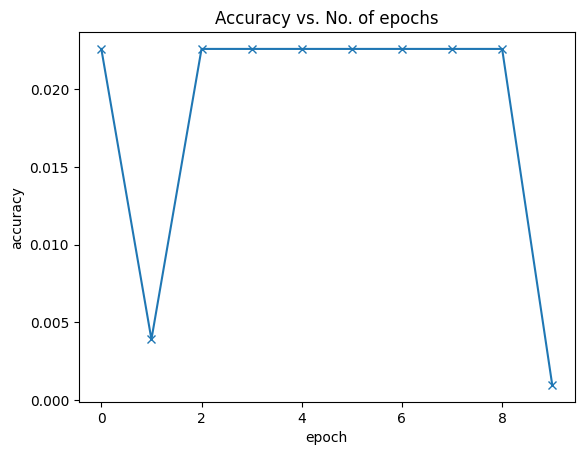

In [66]:
plot_accuracies(history)

Our model reaches an accuracy of around 2.26%, and by looking at the graph, it seems unlikely that the model will achieve an accuracy higher than 2.26% even after training for a long time. This suggests that we might need to use a more powerful model to capture the relationship between the images and the labels more accurately. This can be done by adding more convolutional layers to our model, or incrasing the no. of channels in each convolutional layer, or by using regularization techniques.

We can also plot the training and validation losses to study the trend.

In [67]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

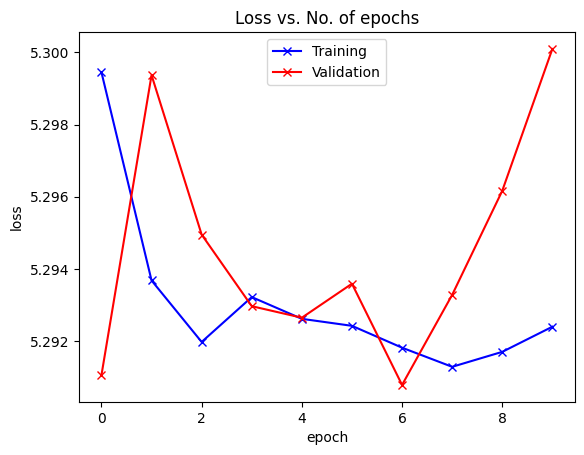

In [68]:
plot_losses(history)

Testing with individual images
While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset of 10000 images. We begin by creating a test dataset using the ImageFolder class.

In [69]:
test_dataset = ImageFolder(DATA_DIR_TEST, transform = test_tfms)

Let's define a helper function predict_image, which returns the predicted label for a single image tensor.

In [70]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return test_dataset.classes[preds[0].item()]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: AM General Hummer SUV 2000 , Predicted: Ford Expedition EL SUV 2009


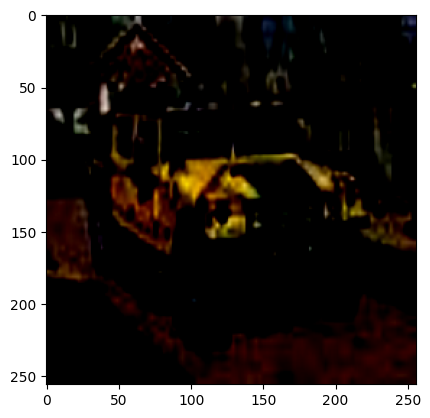

In [71]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_dataset.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: Lamborghini Diablo Coupe 2001 , Predicted: Ford Expedition EL SUV 2009


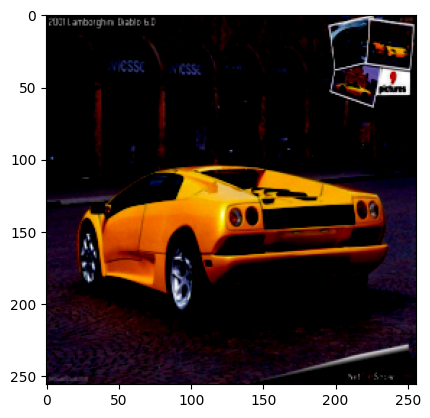

In [72]:
img, label = test_dataset[6153]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_dataset.classes[label], ', Predicted:', predict_image(img, model))

Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complexity of the model, and changing the hypeparameters.

As a final step, let's also look at the overall loss and accuracy of the model on the test set, and record using jovian. We expect these values to be similar to those for the validation set. If not, we might need a better validation set that has similar data and distribution as the test set (which often comes from real world data).

In [73]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_loss': 5.277220726013184, 'val_acc': 0.00537109375}

In [74]:
jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_acc'])

[jovian] Metrics logged.


Saving and loading the model
Since we've trained our model for a long time and achieved a resonable accuracy, it would be a good idea to save the weights of the model to disk, so that we can reuse the model later and avoid retraining from scratch. Here's how you can save the model.

In [75]:
torch.save(model.state_dict(), 'car_data-cnn.pth')

The .state_dict method returns an OrderedDict containing all the weights and bias matrices mapped to the right attributes of the model. To load the model weights, we can redefine the model with the same structure, and use the .load_state_dict method.

In [76]:
model2 = to_device(StanfordCarsModel(), device)

In [77]:
model2.load_state_dict(torch.load('car_data-cnn.pth'))

<All keys matched successfully>

Just as a sanity check, let's verify that this model has the same loss and accuracy on the test set as before.

In [78]:
evaluate(model2, test_loader)

{'val_loss': 5.277220726013184, 'val_acc': 0.00537109375}

In [79]:
jovian.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"
